# Авторегресійний аналіз. Часові ряди.

## Завдання

Протестуйте описані в лекції методи і моделі на датасеті **AirPassenger**, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. Порівняйте метрики оцінки моделі для двох датасетів.

## Розв'язок

In [312]:
import pandas as pd
import matplotlib
from matplotlib import pyplot

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

import itertools

In [313]:
data = pd.read_csv('AirPassengers.csv', index_col='Month')
data.index = pd.to_datetime(data.index)
data.rename(columns={'#Passengers' : 'Passengers'}, inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


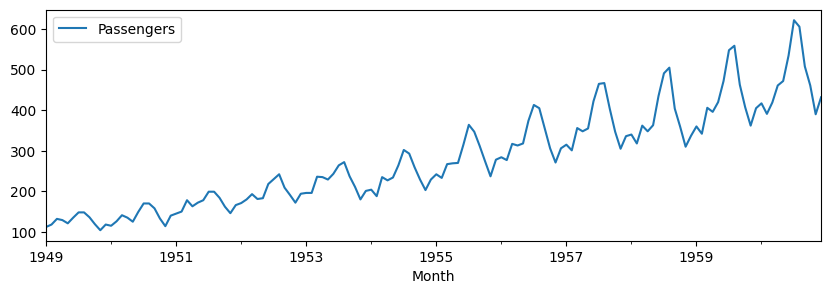

In [315]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
data.plot()
pyplot.show()

Text(0.5, 0.98, 'Мультиплікатива модель')

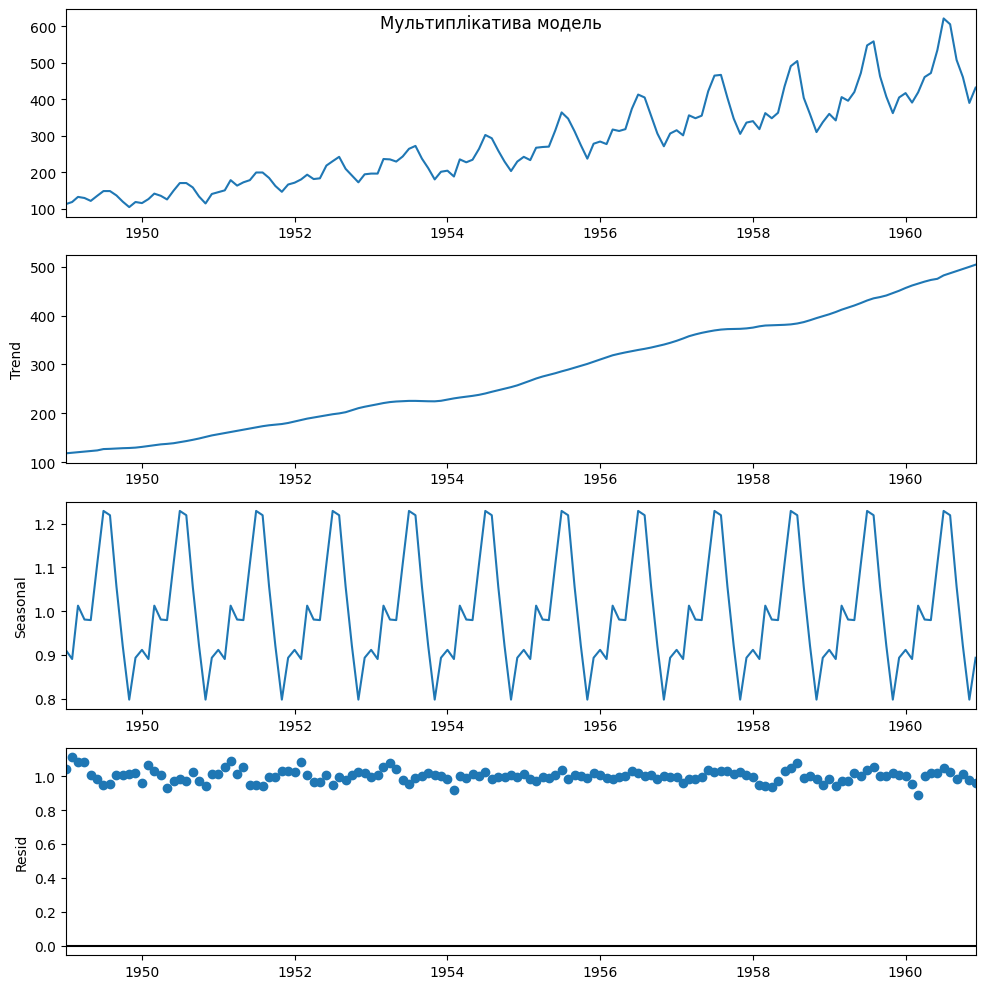

In [316]:
result_decompose = seasonal_decompose(data, model='multiplicative', extrapolate_trend=12)

plt.rcParams.update({'figure.figsize': (10,10)})
result_decompose.plot().suptitle('Мультиплікатива модель')

In [317]:
acf_value = acf(data.Passengers)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

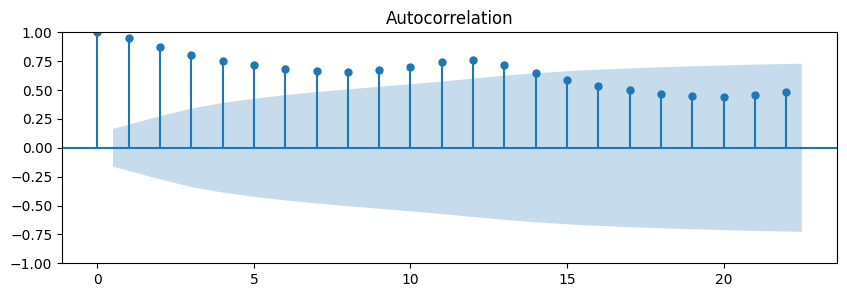

In [318]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_acf(data.Passengers)
pyplot.show()

In [319]:
pacf_value = pacf(data.Passengers, nlags=3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

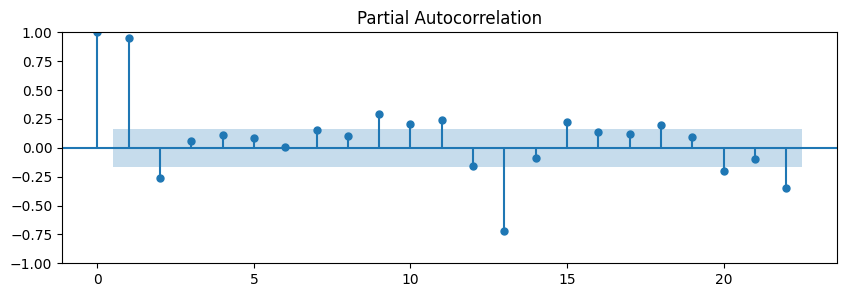

In [320]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_pacf(data.Passengers)
pyplot.show()

### Модель ARIMA

In [321]:
import statsmodels.api as sa

In [322]:
src_data_model = data.Passengers[:115]
model = sa.tsa.ARIMA(src_data_model).fit()

In [323]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                          ARIMA   Log Likelihood                -681.863
Date:                Sat, 18 Mar 2023   AIC                           1367.727
Time:                        10:04:22   BIC                           1373.216
Sample:                    01-01-1949   HQIC                          1369.955
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9478      9.613     24.960      0.000     221.106     258.789
sigma2      8271.3245   1363.556      6.066      0.000    5598.803    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                  98.78   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.57   Skew:                             0.60
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [324]:
pred = model.predict(115,143, typ='levels')

<AxesSubplot: xlabel='Month'>

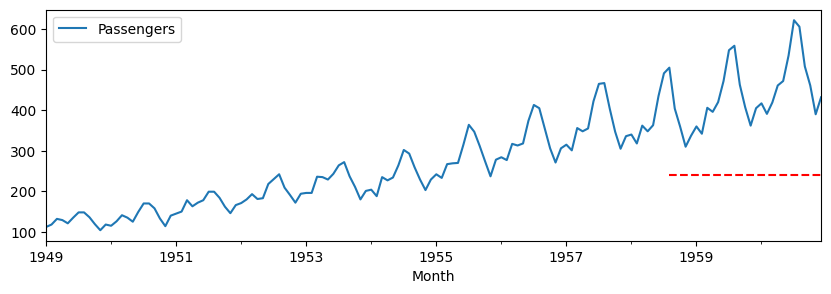

In [325]:
data.plot()
pred.plot(style='r--')

In [326]:
import ml_metrics as metrics

In [327]:
comp = data.Passengers[115:144]

In [328]:
metrics.mae(comp, pred)

200.36252356444086

In [329]:
metrics.rmse(comp, pred)

215.05727316716278

## Модель SARIMAX

In [330]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

In [331]:
pred = model.predict(115, 143, typ='levels')
pred_df = pd.DataFrame(pred)

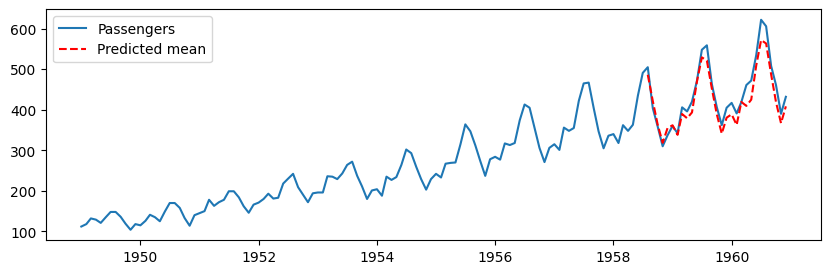

In [332]:
plt.plot(data, label='Passengers')
plt.plot(pred_df, color='r', linestyle='dashed', label='Predicted mean')
plt.legend()

<AxesSubplot: xlabel='Month'>

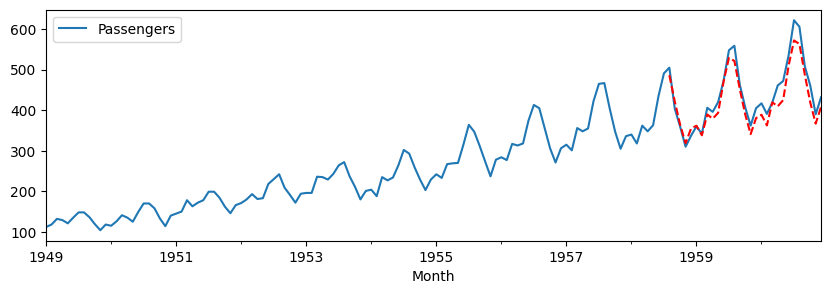

In [333]:
data.plot()
pred.plot(style='r--')

In [334]:
metrics.rmse(comp, pred)

26.440551662646076

In [335]:
comp = data.Passengers[115:144]

In [336]:
metrics.mae(comp, pred)

22.340762737545916

## Висновок

**Для даного часового ряду, згідно метрик більше підходить модель SARIMAX (враховує сезонність, тренд, екзогенні фактори), ніж модель ARIMA (враховує тільки тренд).**